# Gelman Bioassay

An example from [the `PyMC3` docs](https://github.com/pymc-devs/pymc3/blob/master/pymc3/examples/gelman_bioassay.py).

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = "retina"

import numpy as np
import pandas as pd
import pymc3 as pm
import scipy.stats as st

from utils import plt, sns

In [2]:
# Example data
patients = np.array([5, 5, 5, 5])
deaths = np.array([0, 1, 3, 5])
dose = np.array([-0.86, -0.3, -0.05, 0.73])

In [3]:
with pm.Model() as model:
    # Prior
    sigma_a = pm.HalfCauchy("sigma_a", 2.5)
    alpha = pm.Normal("alpha", mu=0, sd=sigma_a)

    sigma_b = pm.HalfCauchy("sigma_b", 2.5)
    beta = pm.Normal("beta", mu=0, sd=sigma_b)

    theta = pm.math.invlogit(alpha + beta * dose)
    probability = pm.Deterministic("probability", theta)

    # Likelihood
    y = pm.Binomial("y", n=patients, p=probability, observed=deaths)

    # Sample
    trace = pm.sample(draws=5000, njobs=4, chain=4)

burn_in = 2000
trace = trace[burn_in:]

Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average ELBO = -6.7174: 100%|██████████| 200000/200000 [00:15<00:00, 12991.20it/s]
Finished [100%]: Average ELBO = -6.9484
100%|██████████| 5000/5000 [00:17<00:00, 281.84it/s]


                    mean         sd  mc_error       hpd_2.5   hpd_97.5
alpha           0.389139   0.678666  0.013754 -7.944168e-01   1.926780
beta            6.235277   3.398901  0.073436  1.296475e+00  13.068028
sigma_a         2.012255   4.296693  0.063817  1.177114e-02   5.998063
sigma_b         8.863336  19.373398  0.320035  7.215886e-01  23.733834
probability__0  0.033969   0.054980  0.000740  1.632965e-13   0.144352
probability__1  0.217542   0.122267  0.001953  7.019818e-04   0.440175
probability__2  0.515761   0.138569  0.002573  2.644932e-01   0.815514
probability__3  0.958865   0.066971  0.001031  8.254909e-01   1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x110c71650>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x116ee5bd0>]], dtype=object)

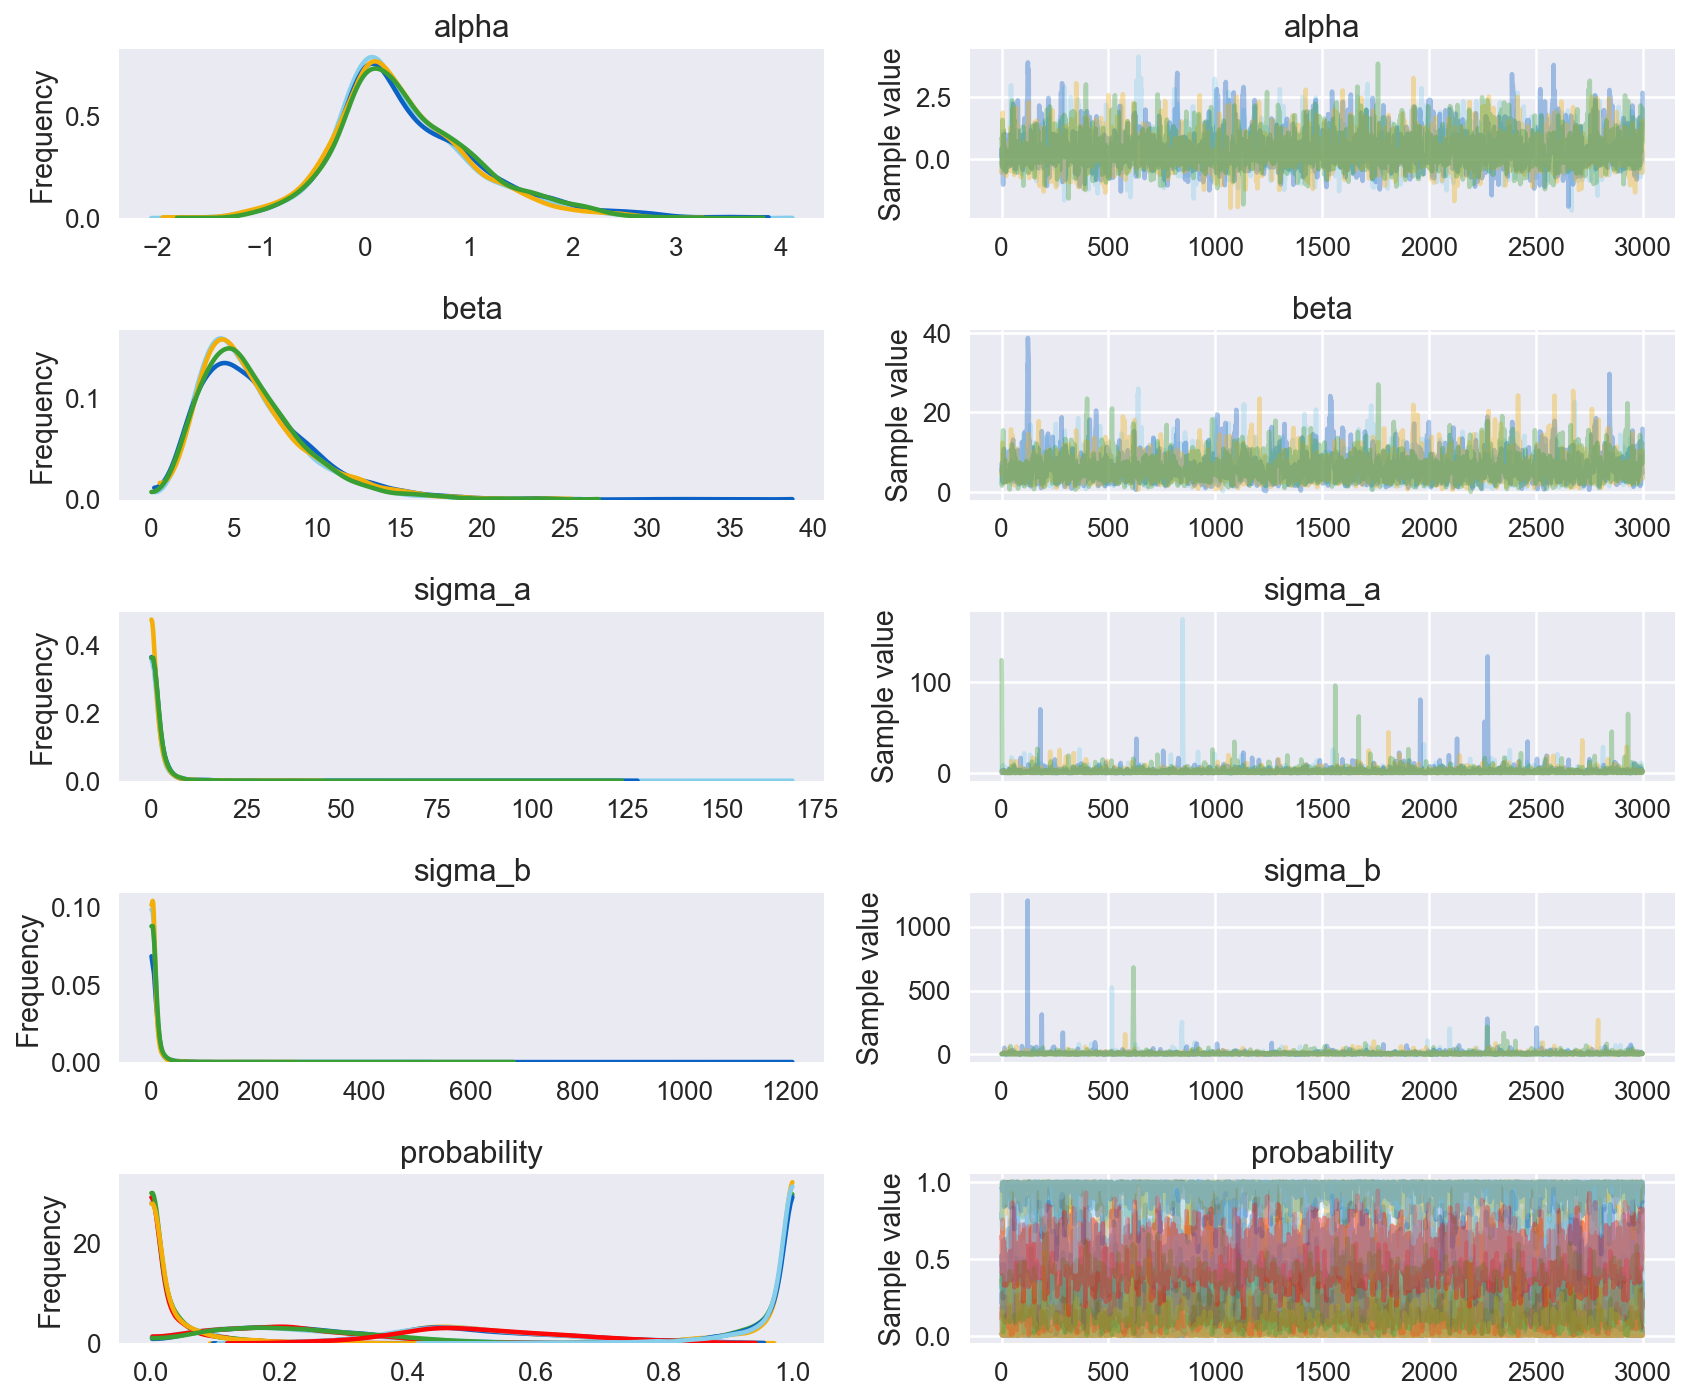

In [4]:
print(pm.df_summary(trace))
pm.traceplot(trace)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x115d85f50>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x11671f390>], dtype=object)

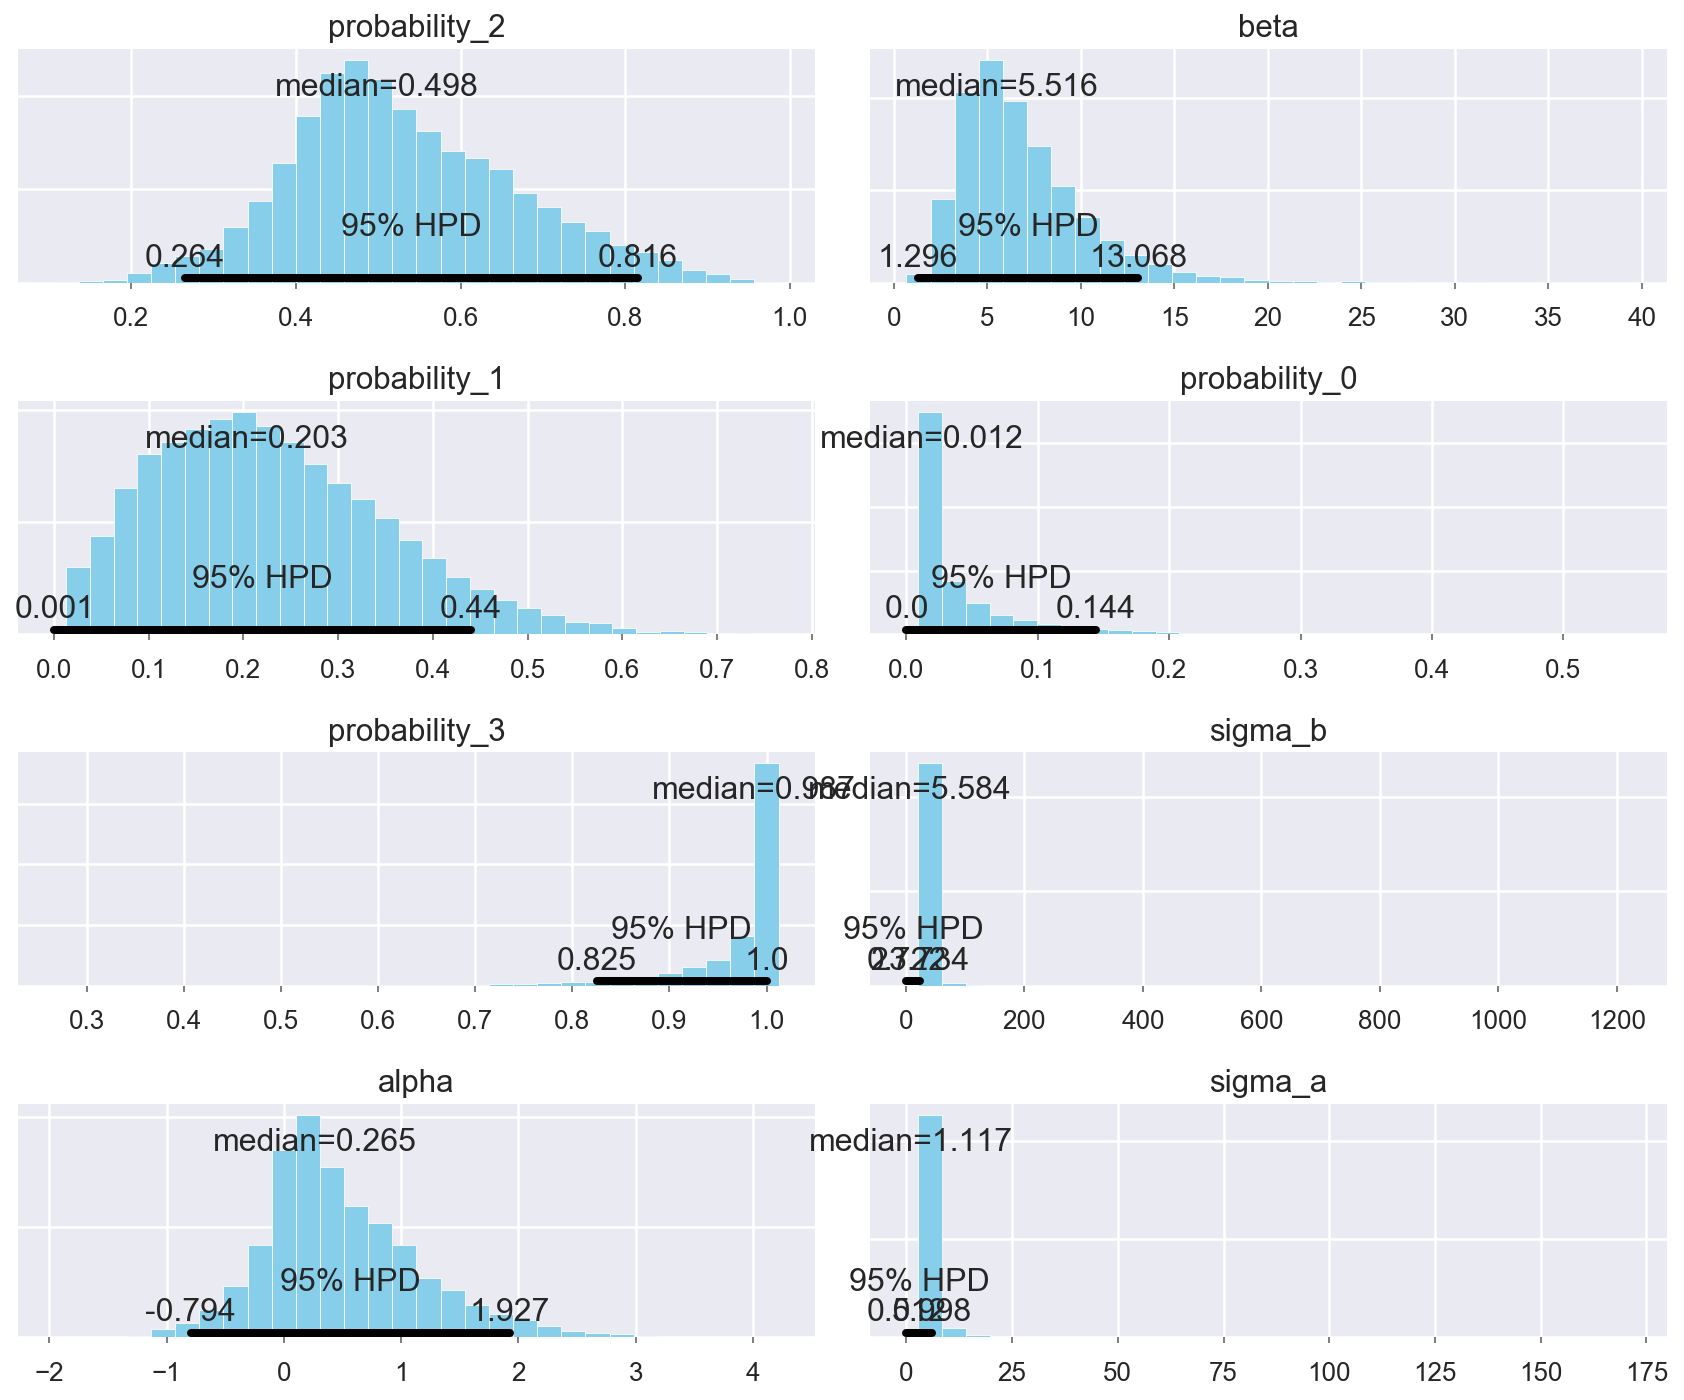

In [5]:
pm.plot_posterior(trace, point_estimate="median")

In [6]:
pm.diagnostics.gelman_rubin(trace)

{'alpha': 1.0015940723992494,
 'beta': 1.0012192205043986,
 'probability': array([ 1.00017936,  1.00089767,  1.00144658,  0.99994191]),
 'sigma_a': 1.0000974924278359,
 'sigma_a_log_': 0.99994352431126943,
 'sigma_b': 1.0003000493044321,
 'sigma_b_log_': 1.0003452317975308}